# Regressão Logística usando Softmax MNIST prog matricial

O objetivo deste notebook é ilustrar o uso do mesmo código matricial desenvolvido para a classificação das Flores Íris, porém agora com o problema de classificação de dígitos manuscritos utilizando o dataset MNIST.

Fonte: Este exemplo foi inspirado no blog : [Gist Softmax por Arthur Juliani](https://medium.com/@awjuliani/simple-softmax-in-python-tutorial-d6b4c4ed5c16#.98wxaxxsc)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline
from keras.datasets import mnist

import pandas as pd

import sys,os
sys.path.append(os.path.abspath('../src/')) # para importar nbpil
import nbpil

In [3]:
def oneHotIt(Y,k):
    Y = Y.reshape(-1,1)
    i = np.arange(k).reshape(1,k)
    Y_oh = (Y == i).astype(int)
    return Y_oh

def softmax(Z):
    # computes softmax for all samples, normalize among classes (columns)
    # input Z: scores; shape: samples rows x classes columns
    # output S: same shape of input
    EZ = np.exp(Z)
    S = EZ / EZ.sum(axis=1,keepdims=True) # normaliza nas classes - colunas
    return S

def predict(X,W):
    S = softmax(X.dot(W))
    # escolhe a maior probabilidade entre as classes
    Y_hat = np.argmax(S,axis=1) # mantém o resultado como matriz bidimensional
    return Y_hat

def getAccuracy(X,W, Y):
    Y_hat = predict(X,W)
    accuracy = sum(Y_hat == Y)/(float(len(Y)))
    return accuracy

## Carregamento dos dados do MNIST, disponível no `Keras`.
Este exemplo utiliza 500 amostras de treinamento e 100 amostras para testes.


X.shape: (1000, 784)
Y.shape: (1000,)
Y_oh.shape: (1000, 10)


""
5
""
0
""
4
""
1
""
9
""


class: 5


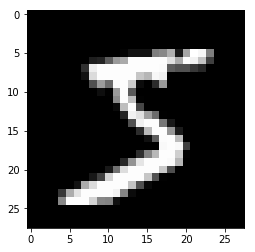

In [9]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
n_train = 1000
n_test = 200

Y = Y_train[:n_train]
Y_oh = oneHotIt(Y,10)

X = X_train[:n_train].reshape((-1,28*28))/255.
X_bias = np.hstack([np.ones((n_train,1)),X]) # incluído X00 como 1 para gerar bias no W
testY = Y_test[:n_test]
testX = X_test[:n_test].reshape((-1,28*28))/255.
testX_bias = np.hstack([np.ones((n_test,1)),testX]) # incluído X00 como 1 para gerar bias no W

print 'X.shape:', X.shape
print 'Y.shape:', Y.shape
print 'Y_oh.shape:', Y_oh.shape

# mostrando com o nbshow (ainda em desenvolvimento)
nb = nbpil.nbshow(ncols=20)
for i in range(60):
    nb.nbshow(np.uint8(X[i].reshape((28,28))*255),'%d'% (Y_train[i],))
nb.nbshow()

# mostrando uma imagem com o matplotlib
plt.imshow(np.reshape(X[0],(28,28)),cmap = 'gray') # retirando primeira coluna (bias no W)
print 'class:',Y[0]

## Laço principal - treinamento

In [34]:
n = X_bias.shape[0] # number of training examples
m = X_bias.shape[1] # number of attributes (features, pixels + 1(bias))
k = 10         # number of classes
W = np.zeros([m,k]) # n. de linhas é igual a número de atributos (features, pixels)
iterations = 1000
learningRate = 1
losses = []
for i in range(iterations):
    scores = X_bias.dot(W)
    S = softmax(scores)
    loss = (-1. / n) * np.sum(Y_oh * np.log(S))
    Grad = (-1. / n) * (X_bias.T).dot(Y_oh - S)
    W = W - (learningRate * Grad)
    losses.append(loss)
print 'Final loss:',loss


Final loss: 0.0226165833741


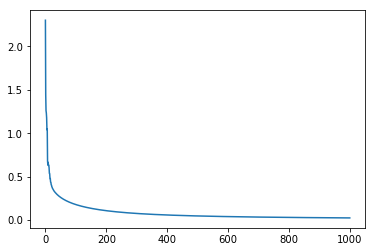

In [32]:
plt.plot(losses)

### Now that we have trained our model, we can see how well it is able to perform on both the training and test sets:

In [28]:
def getAccuracy(X,W, Y):
    Y_hat = predict(X,W)
    accuracy = sum(Y_hat == Y)/(float(len(Y)))
    return accuracy

print 'Training Accuracy: ', getAccuracy(X_bias,W,Y)
print 'Test Accuracy: ', getAccuracy(testX_bias,W,testY)

print 'Matriz de confusão (Treino):'
display(pd.crosstab(predict(X_bias,W), Y))

print 'Matriz de confusão (Teste):'
display(pd.crosstab(predict(testX_bias,W), testY))


Training Accuracy:  0.991
Test Accuracy:  0.91
Matriz de confusão (Treino):


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,97,0,0,0,0,0,0,0,0,1
1,0,115,1,0,0,0,0,0,0,0
2,0,0,96,0,0,1,0,0,0,0
3,0,0,0,92,0,0,0,0,0,0
4,0,0,0,0,105,0,0,0,0,0
5,0,1,0,1,0,90,0,0,0,0
6,0,0,0,0,0,1,94,0,0,0
7,0,0,1,0,0,0,0,117,0,1
8,0,0,0,0,0,0,0,0,87,0


Matriz de confusão (Teste):


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,16,0,0,0,0,0,0,0,0,0
1,0,28,0,0,0,0,0,0,0,0
2,0,0,12,1,0,1,1,0,0,0
3,1,0,1,13,0,0,0,1,0,1
4,0,0,1,0,25,0,0,1,0,0
5,0,0,0,2,0,19,0,0,0,0
6,0,0,1,0,1,0,19,0,0,0
7,0,0,1,0,0,0,0,21,0,1
8,0,0,0,0,0,0,0,0,10,0


### One of the benefits of a simple model like softmax is that we can visualize the weights for each of the classes, and see what it prefers. Here we look at the weights for the '3' class.

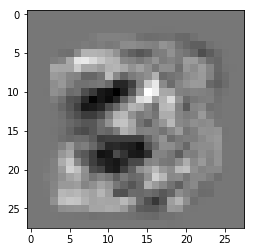

In [29]:
# Visualizando pesos da classe 3
plt.imshow(W[1:,3].reshape((28,28)),cmap = 'gray')

In [30]:
# Visualizando os pesos de todas as classes
for i in range(k):
    img = W[1:,i].reshape((28,28)).copy()
    img -= img.min()
    img /= img.max()
    img = np.uint8(img*255)
    nb.nbshow(img,'%d'% (i,))
nb.nbshow()

""
0
""
1
""
2
""
3
""
4
""


## Atividades

### Perguntas
1. Por que no treino, a acurácia é 100%, mas no teste foi de 90,5%

2. Por que no treino, a acurácia é 100%, porém a função de perda final não é zero, mas sim 0,045 ?

3. O que se deve fazer que a avaliação no conjunto de teste seja melhorado?

### Respostas

1. Treinar com mais amostras, ajustar o número de épocas (early stopping), etc.

2. O método sobreajustou sob os dados de treinamento

3. Por que a perda é computada pelo softmax, então uma entrada teria que ser 1 e as demais zero, enquanto a predição é feita simplesmente pela maior probabilidade computada.

## Conclusões sobre os experimentos deste notebook

- Há problemas de sobreajuste
- Há muitos parâmetros sendo ajustados
